<a href="https://colab.research.google.com/github/hellfireworld/MachineLearning/blob/master/Ergasia1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import essential libraries.**

In [0]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sys
import io
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import pandas
from google.colab import files

**Import day.csv file with GOOGLE_COLAB**

In [0]:
uploaded = files.upload()

Saving day.csv to day.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "day.csv" with length 56806 bytes


**Test if day.csv is loaded by removing comment '#' below**

In [0]:
#uploaded

**Define df variable as day.csv using pandas library.
Read a comma-separated values (csv) file into DataFrame.**

In [0]:
df = pandas.read_csv(io.StringIO(uploaded['day.csv'].decode('utf-8')))

   season  yr  mnth  holiday  ...  weathersit      temp     atemp       hum
0       1   0     1        0  ...           2  0.344167  0.363625  0.805833
1       1   0     1        0  ...           2  0.363478  0.353739  0.696087
2       1   0     1        0  ...           1  0.196364  0.189405  0.437273
3       1   0     1        0  ...           1  0.200000  0.212122  0.590435
4       1   0     1        0  ...           1  0.226957  0.229270  0.436957

[5 rows x 10 columns]
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64
0    few
1    few
2    few
3    few
4    few
Name: cnt, dtype: category
Categories (2, object): [few < many]
few counted: 341
many counted: 390

 The cyclists in dataset are many 

model1:  [[ 0.24463539  0.79228592 -0.00281716 -0.43637838 -0.03994104 -0.02481279
  -0.32853995  1.40242438  1.21855856 -0.38532465]]
model2:  [[ 0.94550048  2.26385021 -0.12928916 -0.49365082 -0.0495436  -0.03810521
  -1.50249033  2.24776028  1.92180578 -0.7346910

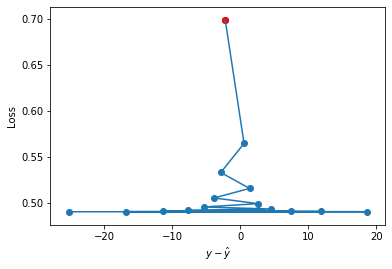

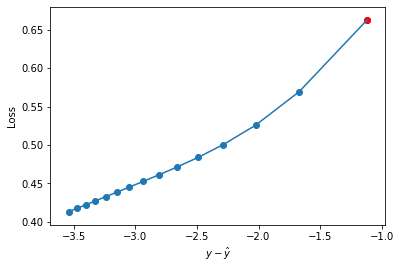

In [0]:
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum']]
X2 = df[['temp']]
y = df['cnt']
print(X.head())
print(y.head())

labels = ["few", "many"] # binary classification few -> 0 and many -> 1
y_categorical = pandas.cut(y, 2, labels=labels)
print(y_categorical.head())

######### y_categorical_array -> few or many################################
count_few = 0
count_many = 0
for i in range(731):
    #print('y_categorical[%d] : '%(i), y_categorical[i])
    if (y_categorical[i] == "many"):
        count_many += 1
    elif(y_categorical[i] == "few"):
        count_few += 1
print('few counted: %d' % count_few)
print('many counted: %d' % count_many)
if count_many > count_few:
    print('\n', 'The cyclists in dataset are many', '\n')
elif count_many < count_few:
    print('\n', 'The cyclists in dataset are few', '\n')
#########################################################

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

#for all the features
fX = X.values
fy = y_categorical.values

#for the most prominent feature
n = 1 ;# number of instances to keep
fX2 = X2[:n].values
fy2 = y_categorical[:n].values

#for all the features
learning_rate = 0.01

sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

p_sum  = [] ;# this holds the sum of y-y_hat, for all instances
p2_sum = []
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model  = sgd.partial_fit(fX, fy, classes=labels)
    model2 = sgd2.partial_fit(fX, fy, classes=labels)
    #print(model.coef_)
    y  = model.predict(fX)
    p  = model.decision_function(fX)
    c  = (1 - np.mean(y == fy))
    p_sum.append(p)
    y2 = model2.predict(fX)
    p2 = model2.decision_function(fX)
    c2 = (1 - np.mean(y2 == fy))
    p2_sum.append(p2)
    #p = model.predict_proba(fX)
    #print(y, y2, fy, c, c2, p, p2)
    #p_sum.append(np.sum(fy-y))

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
# print(loss_history)
loss_list = []
loss2_list = []
use_first = True
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    if use_first:
        loss_list.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list.append(float(line.split("loss: ")[-1]))
    use_first = not use_first
print('model1: ', model.coef_)
print('model2: ', model2.coef_)

################# for the most_prominent feature ############################
learning_rate = 2

sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

p3_sum  = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
p4_sum = []
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model3  = sgd.partial_fit(fX2, fy2, classes=labels)
    model4 = sgd2.partial_fit(fX2, fy2, classes=labels)
    #print(model.coef_)
    y3  = model3.predict(fX2)
    p  = model3.decision_function(fX2)
    c3  = (1 - np.mean(y3 == fy2))
    p3_sum.append(p)
    y4 = model4.predict(fX2)
    p2 = model4.decision_function(fX2)
    c4 = (1 - np.mean(y4 == fy2))
    p4_sum.append(p2)
    #p = model.predict_proba(fX)
    #print(y, y2, fy, c, c2, p, p2)
    #p_sum.append(np.sum(fy-y))

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
# print(loss_history)
loss_list3 = []
loss2_list4 = []
use_first2 = True
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    if use_first2:
        loss_list3.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list4.append(float(line.split("loss: ")[-1]))
    use_first2 = not use_first2
print('model3: ', model3.coef_)
print('model4: ', model4.coef_)


#plt.figure()
#plt.plot(np.arange(len(loss_list)), loss_list)
#plt.scatter(np.arange(len(loss_list)), loss_list)
#plt.xlabel("Time in epochs")
#plt.ylabel("Loss")
#plt.show()
#plt.figure()
#plt.plot(np.arange(len(loss2_list)), loss2_list)
#plt.scatter(np.arange(len(loss2_list)), loss2_list)
#plt.xlabel("Time in epochs")
#plt.ylabel("Loss")
#plt.show()


#########################  For one of the two prominent features selected in step a), plot the loss with respect to (y-y[hat])################################
plt.figure()
plt.plot(p3_sum, loss_list3)
plt.scatter(p3_sum, loss_list3)
plt.scatter(p3_sum[:1], loss_list3[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(p4_sum, loss2_list4)
plt.scatter(p4_sum, loss2_list4)
plt.scatter(p4_sum[:1], loss2_list4[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()